In [1]:
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

# display function to show image on Jupyter
def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
    plt.axis(False)
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [13]:
LABELS = open("classes.names").read().strip().split("\n")

In [8]:
net = cv2.dnn.readNetFromDarknet("yolov3_custom.cfg","yolov3_custom_2000.weights")

In [46]:
def predict(image):
    
    # initialize a list of colors to represent each possible class label
    im_y = image.shape[1]
    im_x = image.shape[0]
    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
    (H, W) = image.shape[:2]
    
    # determine only the "ouput" layers name which we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    # construct a blob from the input image and then perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    threshold = 0.01
    text_list = []
    
    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            # confidence type=float, default=0.5
            if confidence > threshold:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.1)

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            color = (255,0,0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}".format(LABELS[classIDs[i]], confidences[i])
            text = int(text) - 1
            text = str(text)
            text_list.append(text)
            
            #cv2.putText(image, text, ( int(im_x/2) + 12, int(im_y/2)), cv2.FONT_HERSHEY_SIMPLEX,
                #1, color, 2)
    
    for i in range (0,len(text_list)):
        print("Label: " + text_list[i])
        
    #for i in range(len(text_list)-1,-1,-1):
        #print("Label: " + text_list[i])
    label_list = text_list
    return image

Label: 1
Label: 6


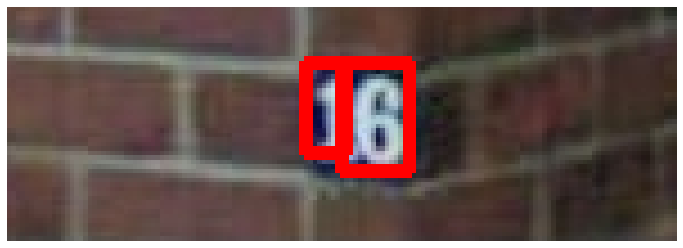

In [43]:
img = cv2.imread("test/98.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Label: 1
Label: 0


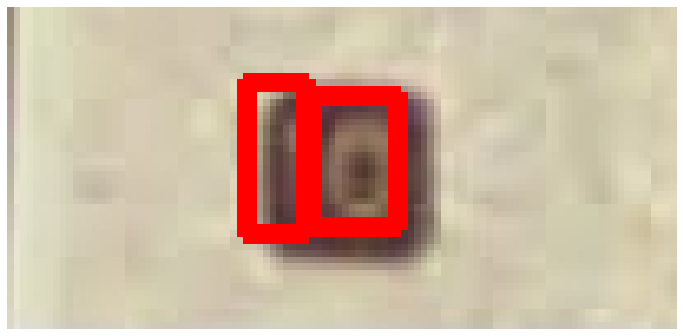

In [44]:
img = cv2.imread("test/144.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Label: 1
Label: 3


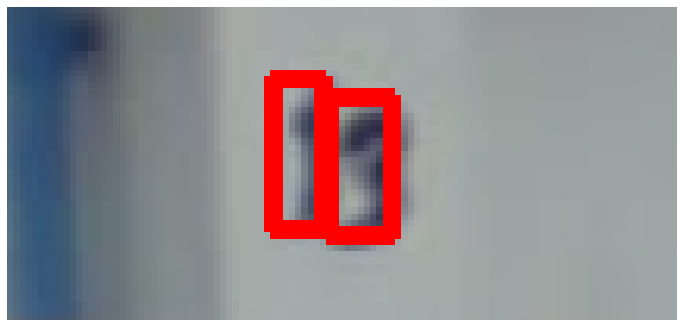

In [47]:
img = cv2.imread("test/2100.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Label: 3
Label: 0


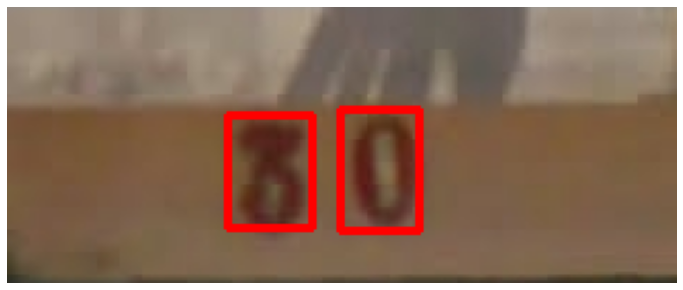

In [49]:
img = cv2.imread("test/1110.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

#Failures

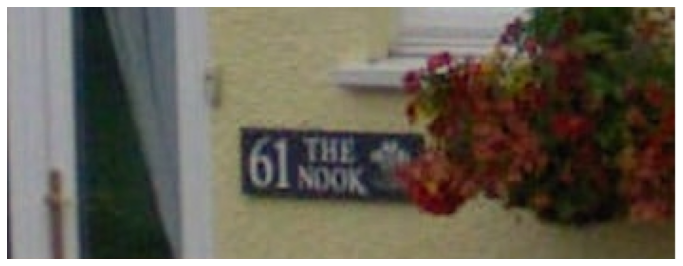

In [50]:
img = cv2.imread("test/100.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

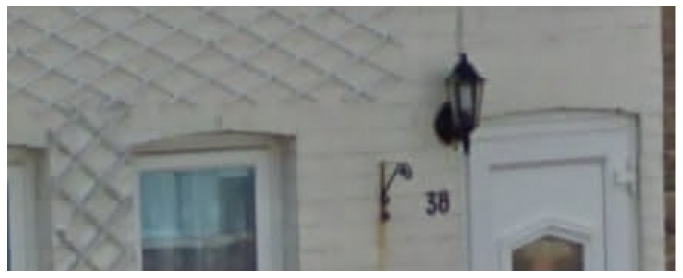

In [52]:
img = cv2.imread("test/145.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Label: 3


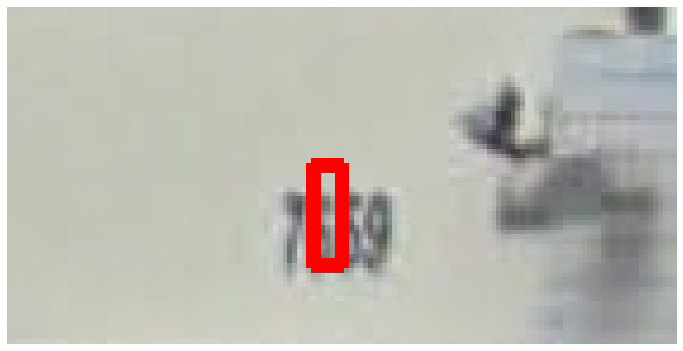

In [48]:
img = cv2.imread("test/298.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))